<a href="https://colab.research.google.com/github/ramannaik1408/GIS/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Interest**

I am intersted on working on data about population density and the income variance in that particulat area.
The region I have chosen is one of favourite in the US, that is, California. The reason I have chosen California is because of its size, diversity and complexity. Plus, there is a lot of data to work with for California.


### Resources

I have found a perfect shapefile for California already from the following resource:

https://hub.arcgis.com/datasets/a61c138d0a6946da8d1ebb8d1c9db13a_0/explore?location=17.138890%2C75.315503%2C2.87

I have also found data for the median income of California according to County:

https://data.ca.gov/dataset/income-limits-by-county

I have also found data for crime rate by county in California:

https://www.ppic.org/wp-content/uploads/crime-rates-by-county-2019.xlsx

I am working on data with respect to income and crime in California
I am going to compare these factors to find trends and relation between income and crimne in this state


I have uploaded the data that I have found in the GitHub repo

In [51]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [52]:
!pip install mapclassify
import mapclassify

In [53]:
! wget -q -O cali-counties.zip https://github.com/ramannaik1408/GIS/raw/main/California_County_Boundaries.zip
zip_ref = zipfile.ZipFile('cali-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
cali=gpd.read_file('cnty19_1.shp') #load the shapefile of california

In [54]:
cali.dtypes

OBJECTID         int64
COUNTY_NAM      object
COUNTY_ABB      object
COUNTY_NUM       int64
COUNTY_COD      object
COUNTY_FIP      object
ISLAND          object
GlobalID        object
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [55]:
cali_final= cali[['OBJECTID','COUNTY_NAM','SHAPE_Leng','SHAPE_Area','geometry']]


<Axes: >

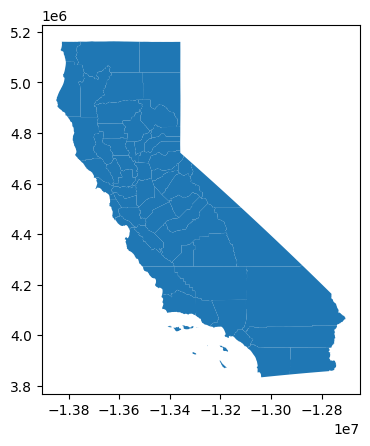

In [56]:
cali_final.plot()

##Dataset Resources

I have found this dataset containing income of California residents by county from the following source:

https://data.ca.gov/dataset/income-limits-by-county

The AMI column contains the Annual Median Income in 2019 which I have made use of for plotting the map

In [ ]:
income_cali = pd.read_csv('https://github.com/ramannaik1408/GIS/raw/main/2022-income-limits.csv')
income_cali

In [ ]:
income_cali.rename(columns={'County': 'COUNTY_NAM','AMI': 'Annual Median Income'}, inplace=True)
##income_cali.rename(columns={'AMI': 'Annual Monthly Income'}, inplace=True)
income_cali=income_cali[['COUNTY_NAM','Annual Median Income']]
print(income_cali.columns)

##Plotting map containing income of California:

In [ ]:
map1 = pd.merge(cali_final, income_cali, on='COUNTY_NAM',how='outer',indicator=False)
fig, ax = plt.subplots(1, figsize=(5,10))
map1.plot(ax=ax,column='Annual Median Income',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("California Income By County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')

:

##Dataset Resource

I have found this dataset containing crime data in California

https://www.ppic.org/wp-content/uploads/crime-rates-by-county-2019.xlsx

In [ ]:
cali_crime=pd.read_excel('https://github.com/ramannaik1408/GIS/raw/main/crime-rates-by-county-2019.xlsx')
cali_crime

##Rounding off to 2 decimal places to make it look neater

In [ ]:
cali_crime.rename(columns={'County': 'COUNTY_NAM'}, inplace=True)
cali_crime=cali_crime.round(2)

##Plotting the map

So basically the above dataset contains crime data for Violent which is the sum of crimes of Murder, Rape, Robbery, Aggravated Assault per 100000 people. So I did not have to download the number by population since data was already processed

Hence, I have used the column Violent for plotting the map for Violent crimes.

In [ ]:
map2 = pd.merge(cali_final,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
fig, ax = plt.subplots(1, figsize=(5,10))
map2.plot(ax=ax,column='Violent',legend=True,cmap='YlGnBu_r',
          scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Violent Crimes in California by county")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

##Plotting the map

The above dataset also contains crime data for Property which is the sum of crimes of Burglary, Vehicle Theft and Larceny Theft per 100000 people. So I did not have to divide the number by population since data was already processed

Hence, I have used the column Property for plotting the map for Property crimes.

In [ ]:
map3 = pd.merge(cali_final,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
fig, (ax) = plt.subplots(1,figsize=(5,10))
map3.plot(ax=ax,column='Property',cmap='viridis_r', scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,legend=True)
leg1 = ax.get_legend()
ax.set_axis_off()
ax.title.set_text("Property Crimes in California by county")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')

##Side by side comparision of both the maps against Income

##Starting off with Property Crimes

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.5})
map1 = pd.merge(cali_final, income_cali, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax = plt.subplots(1, figsize=(5,10))
map1.plot(ax=ax,column='Annual Median Income',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("California Income By County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')

map3 = pd.merge(cali_final,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax2 = plt.subplots(1,figsize=(5,10))
map3.plot(ax=ax2,column='Property',cmap='RdYlGn_r', scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,legend=True)
leg1 = ax2.get_legend()
#ax2.set_axis_off()
ax2.title.set_text("Property Crimes in California by county")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks


From the above map we can conclude that property crimes are reasonably high in areas like San Francisco Bay area, Los Angeles and San Diego.

The reason for this can be inferred from the income map because the income is quite high in those counties, hence we can find richer people, hence more Property crime because of more money and high tech property.


There is an exception case in this map, that is, the north western side(Del Norte and Humboldt Region) of the sate, where income is low, but property crime is high. One of the reason could be that, they are tourist hotspots because they are filled with National Parks, hence a lot of visitors, so that might be affecting the crime rate there.

##Violent Crimes

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.5})
map1 = pd.merge(cali, income_cali, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax = plt.subplots(1, figsize=(5,10))
map1.plot(ax=ax,column='Annual Median Income',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("California Income By County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')

map2 = pd.merge(cali,cali_crime, on='COUNTY_NAM',how='outer',indicator=False)
#fig, ax = plt.subplots(1, figsize=(5,10))
map2.plot(ax=ax2,column='Violent',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=8, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4})
leg1 = ax.get_legend()
ax2.title.set_text("Violent Crimes in California by county")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax2.set_xlabel('''source/definition: zillow.com/research/data''')

From the violent crime we can conclude that the richer areas like Los Angeles, San Francisco, San Diego have relatively lesser crime per 100000 people. This is reasonable because we can see that these counties have high population, hence, predators are in fear of commiting these crimes.

Towards the northeast side of California that is less populated has higher crime rate. One of the reasons could be less population. Since it is not a very happening place and income is lesser, it is more suseptible to crime.